# <font style = "color:rgb(50,120,229)">Predicting House Prices with Linear Regression</font>

## <font style = "color:rgb(50,120,229)">Problem Statement</font>

In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in the suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis. 

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represents aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. 

## <font style = "color:rgb(50,120,229)">The Data</font>

Our data comes from a Kaggle competition named “House Prices: Advanced Regression Techniques”.  

It contains 1460 training data points and 80 features that might help us predict the selling price of a house. 

### <font style = "color:rgb(8,133,37)">Import Libraries</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from scipy.stats import norm, skew
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline

### <font style = "color:rgb(8,133,37)">Read Data</font>

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Let's first drop the `Id` column.

In [6]:
colsToDrop = ['Id']
train.drop('Id',axis=1,inplace=True)

In [7]:
test.drop('Id',axis=1,inplace=True)

In [8]:
train.shape

(1460, 80)

In [9]:
test.shape

(1459, 79)

Next, let's go over some basic information about the data that we have.

In [10]:
# Data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [12]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### <font style = "color:rgb(8,133,37)">Preprocessing</font>

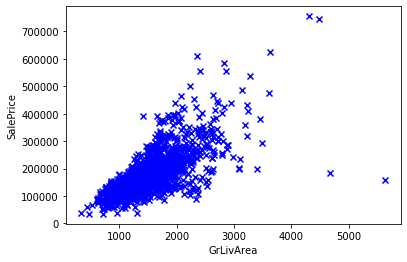

In [13]:
# Look for outliers
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "x")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

Let's remove all points with `GrLivArea` > 4000

In [14]:
train = train[train.GrLivArea < 4000]

We will now use **Heatmap** to get an idea of the correlation between the features and **`SalePrice`**.

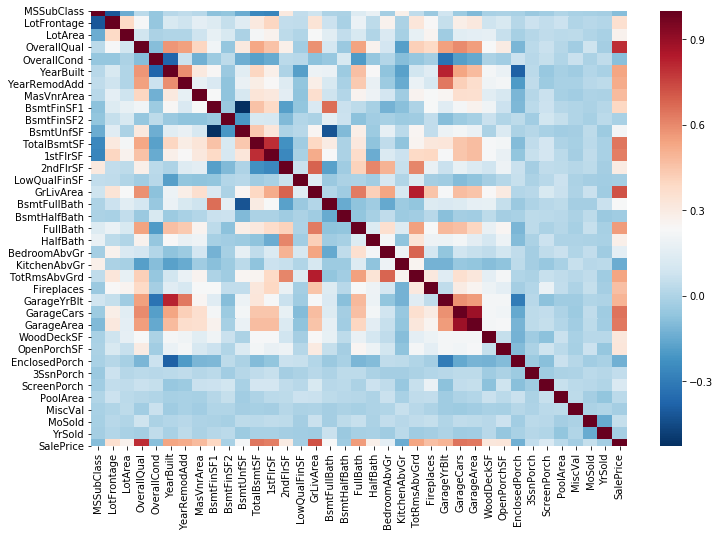

In [15]:
corr_matrix = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="RdBu_r")
plt.show()

Let's reduce this to lesser features based on correlation with 'SalePrice'.

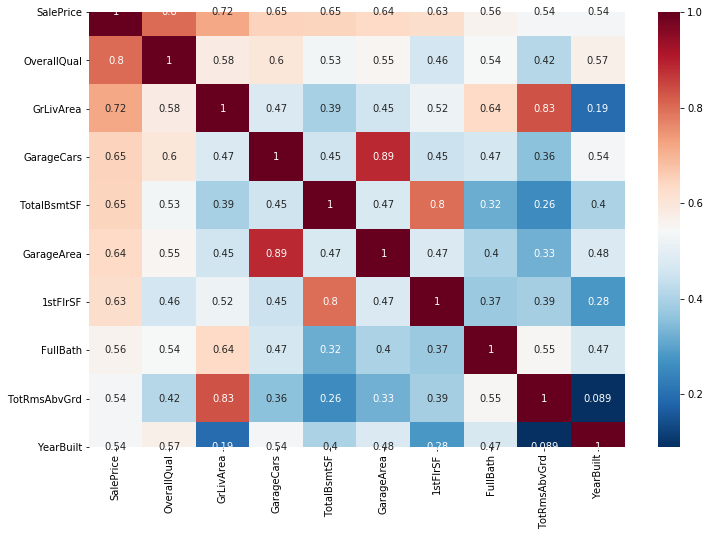

In [16]:
k = 10
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
k_corr_matrix = train[cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(k_corr_matrix, annot=True, cmap="RdBu_r")

The most correlated features with `SalePrice`:

- `OverallQual`: Rates the overall material and finish of the house
- `GrLivArea`: Above grade (ground) living area square feet
- `GarageCars` and `GarageArea`: the most strongly correlated features. We can drop one of them
- `TotalBsmtSf` and `1stFlrSF`: square feet of basement and 1st floor. We can drop one of them as they are highly correlated.
- `FullBath`: Full bathrooms
- `TotRmsAbvGrd`: Total rooms above grade (does not include bathrooms)
- `YearBuilt`: Original construction date decides the years of house

Let's also use Seaborn's pairplot to visualize the relationship in numerical fields.

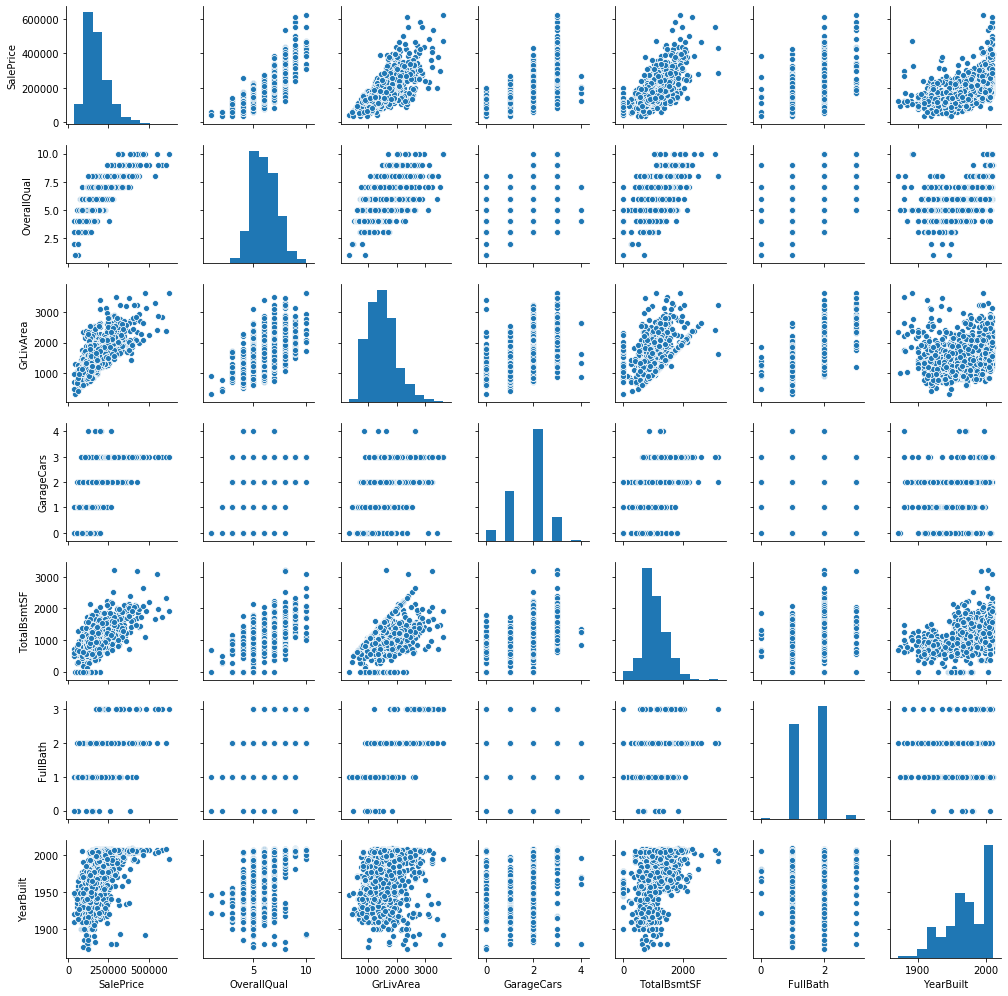

In [17]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height=2)

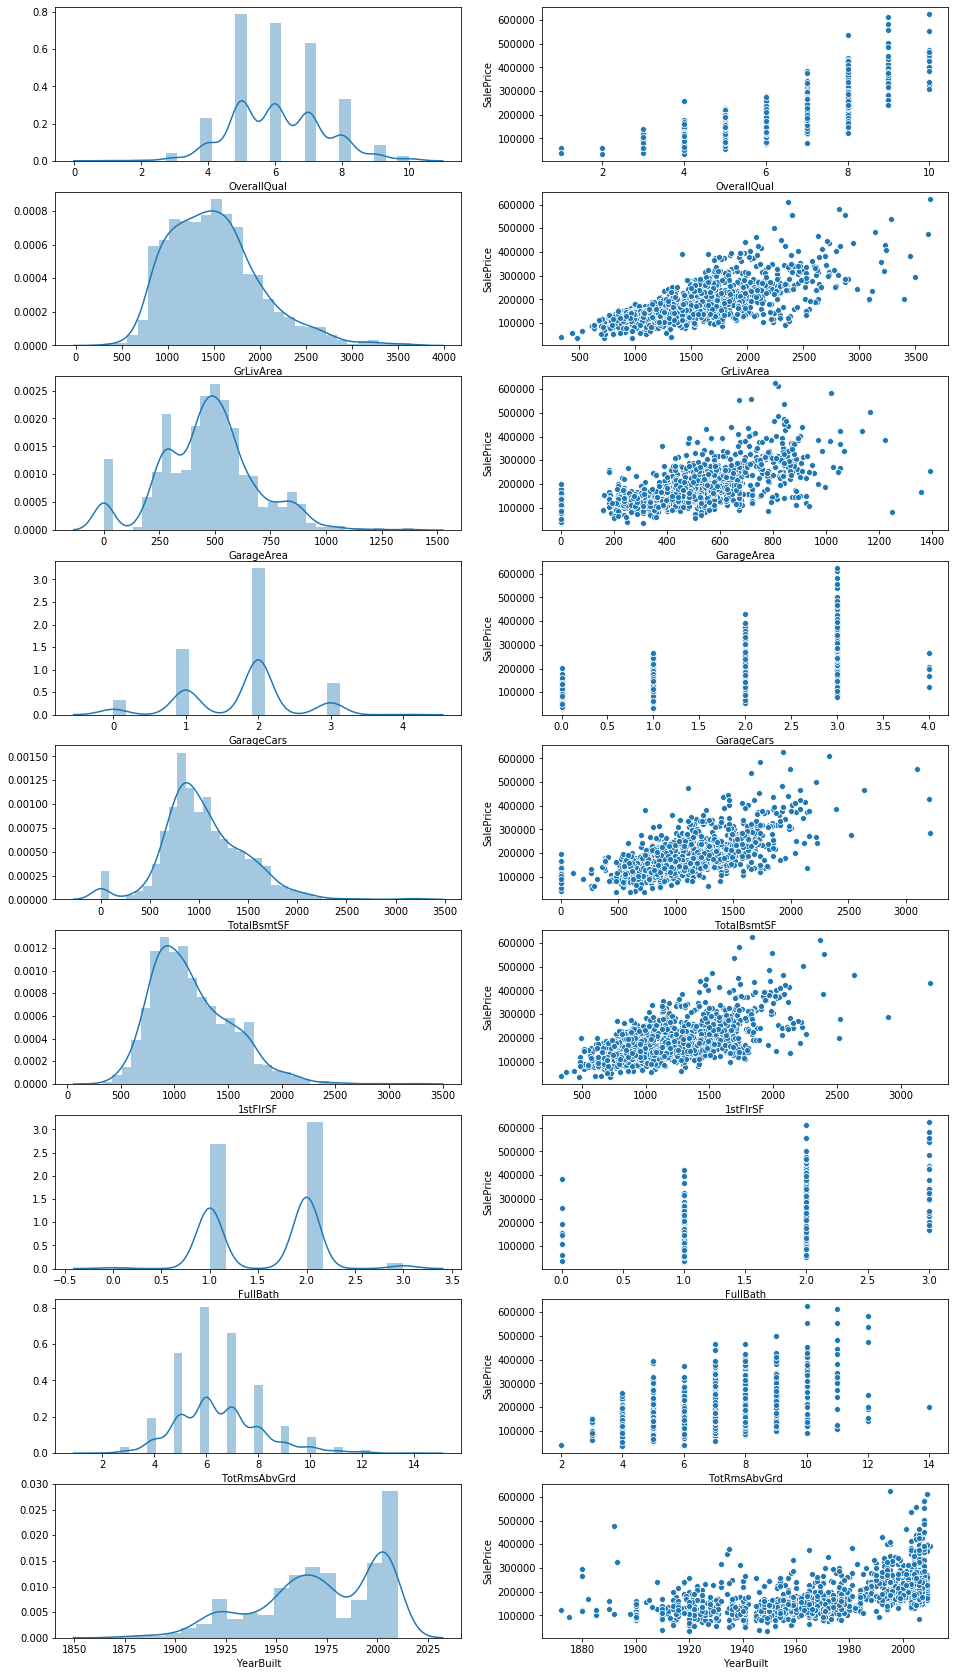

In [18]:
plt.figure(figsize=(16, 30))
for idx, f in enumerate(['OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 
                         'FullBath', 'TotRmsAbvGrd','YearBuilt']):
    plt.subplot(9, 2, 2*idx+1)
    sns.distplot(train[f])
    plt.subplot(9, 2, 2*idx+2)
    sns.scatterplot(x=f, y='SalePrice', data=train)

One major thing to note is that several columns are skewed - something that we will have to deal with.

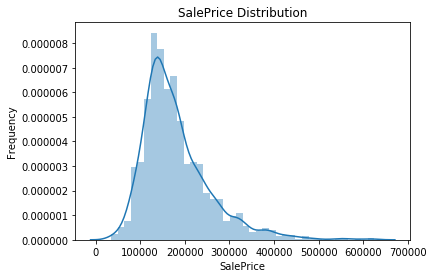

In [19]:
sns.distplot(train['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')
plt.show()

We will apply log transformation to make it normal skewed.

In [20]:
# applying log transformation
train['SalePriceLog'] = np.log1p(train['SalePrice'])

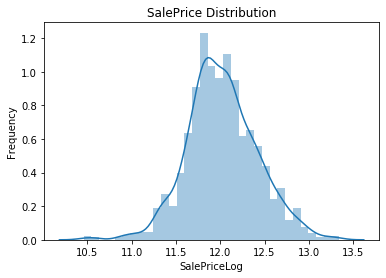

In [21]:
sns.distplot(train['SalePriceLog'])
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')
plt.show()

Next, we will use Standardization on SalePriceLog data.

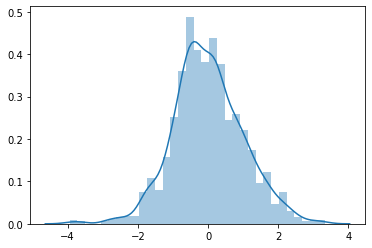

In [22]:
sale_price_scaled = StandardScaler().fit_transform(train['SalePriceLog'][:, np.newaxis])

sns.distplot(sale_price_scaled)

### <font style = "color:rgb(8,133,37)">Feature Engineering</font>

Let's start off by finding the quantitative and qualitative features.

In [23]:
quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
quantitative.remove('SalePrice') # This is our target variable
quantitative.sort()
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
qualitative.sort()

In [24]:
print("Number of quantitative fields: {}".format(len(quantitative)))
print("Number of qualitative fields: {}".format(len(qualitative)))

Number of quantitative fields: 37
Number of qualitative fields: 43


Now, let's start going over the missing values. Since we have to apply similar analysis on both train and test data. Let's concat them and proceed.

In [25]:
train.reset_index(drop=True, inplace=True)
y_train = train['SalePriceLog']
X_train = train.drop(['SalePrice', 'SalePriceLog'], axis=1)
X_test = test

In [26]:
all_data = pd.concat([X_train, test], axis=0, sort=False)
all_data.shape

(2915, 79)

In [27]:
all_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [28]:
na_total = all_data.isnull().sum().sort_values(ascending=False)
na_ratio = (all_data.isnull().sum() / all_data.shape[0]).sort_values(ascending=False)
missing_data = pd.concat([na_total, na_ratio], axis=1, keys=['Total', 'Ratio'])
missing_data.head(50)

,Total,Ratio
PoolQC,2907,0.997256
MiscFeature,2810,0.963979
Alley,2717,0.932075
Fence,2345,0.804460
FireplaceQu,1420,0.487136
LotFrontage,486,0.166724
GarageCond,159,0.054545
GarageQual,159,0.054545
GarageYrBlt,159,0.054545
GarageFinish,159,0.054545


In [29]:
# Let's start removing the columns which have high percentage of missing data
all_data.drop(['PoolQC', 'Utilities', 'Street', 'MiscFeature', ], axis=1, inplace=True)

In [30]:
all_data['Alley'].fillna('None', inplace=True)
all_data['Fence'].fillna('None', inplace=True)
all_data['FireplaceQu'].fillna('None', inplace=True)

all_data['GarageQual'].fillna('None', inplace=True)
all_data['GarageFinish'].fillna('None', inplace=True)
all_data['GarageCond'].fillna('None', inplace=True)
all_data['GarageType'].fillna('None', inplace=True)

all_data['BsmtExposure'].fillna('None', inplace=True)
all_data['BsmtCond'].fillna('None', inplace=True)
all_data['BsmtQual'].fillna('None', inplace=True)
all_data['BsmtFinType2'].fillna('None', inplace=True)
all_data['BsmtFinType1'].fillna('None', inplace=True)

In some columns, we will use **mode** to impute missing values.

In [31]:
all_data['MasVnrType'].fillna('None', inplace=True)
all_data['HasMasVnr'] = all_data['MasVnrType'].apply(lambda x: 0 if x == 'None' else 1)

all_data['MSZoning'] = all_data.groupby(['MSSubClass'])['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
all_data['Functional'].fillna('Typ', inplace=True)
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In the following numerical fields, we will use **median** to impute missing values.

In [32]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [33]:
all_data['GarageYrBlt'] = (all_data['YearBuilt'] + all_data['YearRemodAdd']) /2

In [34]:
all_data['MasVnrArea'] = all_data.groupby(['MasVnrType'])['MasVnrArea'].transform(lambda x: x.fillna(x.median()))

In [35]:
all_data['GarageArea'].fillna(0, inplace=True)
all_data['GarageCars'].fillna(0, inplace=True)

In [36]:
all_data['TotalBsmtSF'].fillna(0, inplace=True)
all_data['BsmtUnfSF'].fillna(0, inplace=True)
all_data['BsmtFinSF1'].fillna(0, inplace=True)
all_data['BsmtFinSF2'].fillna(0, inplace=True)
all_data['BsmtFullBath'].fillna(0, inplace=True)
all_data['BsmtHalfBath'].fillna(0, inplace=True)

In [37]:
# Let's merge related fields to create new features
all_data['YrBltAndRemod']=all_data['YearBuilt']+all_data['YearRemodAdd']
all_data['TotalSF']=all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

all_data['TotalSqrFootage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] +
                                 all_data['1stFlrSF'] + all_data['2ndFlrSF'])

all_data['TotalBathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))

all_data['TotalPorchSF'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])

In [38]:
# Let's create new and "simplified" features
all_data['has2ndfloor'] = all_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasgarage'] = all_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasbsmt'] = all_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
all_data['hasfireplace'] = all_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [39]:
# Some of the non-numeric predictors are stored as numbers; we convert them into strings 
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [40]:
all_data = pd.get_dummies(all_data).reset_index(drop=True)

In [41]:
all_data.isnull().sum().sort_values(ascending=False)

SaleCondition_Partial    0
Neighborhood_Sawyer      0
Neighborhood_Somerst     0
Neighborhood_StoneBr     0
Neighborhood_Timber      0
                        ..
BsmtFinType1_LwQ         0
BsmtFinType1_None        0
BsmtFinType1_Rec         0
BsmtFinType1_Unf         0
LotFrontage              0
Length: 328, dtype: int64

We have now dealt with all the missing values and we can now start building the model.

### <font style = "color:rgb(8,133,37)">Model Building</font>

In [42]:
X_train = all_data.iloc[:len(y_train), :]
X_test = all_data.iloc[len(y_train):, :]

In [43]:
X_train.shape, y_train.shape, X_test.shape

((1456, 328), (1456,), (1459, 328))

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,random_state=3)

In [45]:
y_train.head()

490     11.652696
1203    11.580593
923     12.072547
1200    12.269052
1351    12.043560
Name: SalePriceLog, dtype: float64

In [46]:
y_val.head()

140     11.652696
948     11.767575
248     12.100718
1185    12.180760
587     11.870607
Name: SalePriceLog, dtype: float64

In [47]:
X_train.shape, X_val.shape

((1092, 328), (364, 328))

Let's start off by taking all the features for building the linear regression model.

In [48]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [49]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     68.90
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:26:34   Log-Likelihood:                 1155.0
No. Observations:                1092   AIC:                            -1784.
Df Residuals:                     829   BIC:                            -470.0
Df Model:                         262                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.43

/home/hp/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/hp/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/hp/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/hp/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [50]:
from sklearn.metrics import r2_score

In [51]:
X_val_lm = sm.add_constant(X_val)

In [52]:
X_val_lm.shape

(364, 329)

In [53]:
X_train_lm.shape

(1092, 329)

In [54]:
y_val_predict = lr.predict(X_val_lm)

In [55]:
r2_score(y_val,y_val_predict)

0.8808991906512817

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
# Let's now evaluate VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/hp/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/hp/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
164,Exterior1st_Wd Sdng,inf
246,Electrical_Mix,inf
224,BsmtFinType2_BLQ,inf
223,BsmtFinType2_ALQ,inf
222,BsmtFinType1_Unf,inf
...,...,...
32,MiscVal,1.45
44,MSSubClass_150,NaN
152,Exterior1st_AsphShn,NaN
175,Exterior2nd_Other,NaN


We generally want a VIF that is less than 5 and p-value less than 0.05. So there are clearly some variables we need to drop.

Let's use RFE to help us out with this. We will select top 30 variables and then proceed from there.

In [58]:
from sklearn.feature_selection import RFE

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 30) # running RFE
rfe = rfe.fit(X_train, y_train)

In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 292),
 ('LotArea', False, 298),
 ('OverallQual', False, 287),
 ('OverallCond', False, 286),
 ('YearBuilt', False, 11),
 ('YearRemodAdd', False, 12),
 ('MasVnrArea', False, 296),
 ('BsmtFinSF1', False, 102),
 ('BsmtFinSF2', False, 108),
 ('BsmtUnfSF', False, 106),
 ('TotalBsmtSF', False, 103),
 ('1stFlrSF', False, 107),
 ('2ndFlrSF', False, 104),
 ('LowQualFinSF', False, 100),
 ('GrLivArea', False, 97),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', False, 290),
 ('KitchenAbvGr', False, 284),
 ('TotRmsAbvGrd', False, 291),
 ('Fireplaces', False, 293),
 ('GarageYrBlt', False, 9),
 ('GarageCars', False, 285),
 ('GarageArea', False, 295),
 ('WoodDeckSF', False, 110),
 ('OpenPorchSF', False, 112),
 ('EnclosedPorch', False, 111),
 ('3SsnPorch', False, 113),
 ('ScreenPorch', False, 94),
 ('PoolArea', False, 294),
 ('MiscVal', False, 297),
 ('HasMasVnr', True, 1),
 ('YrBltAndRemod', False, 8),
 (

In [62]:
col = X_train.columns[rfe.support_]
col

Index(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'HasMasVnr',
       'TotalBathrooms', 'hasgarage', 'MSSubClass_90', 'LandSlope_Mod',
       'LandSlope_Sev', 'BldgType_Duplex', 'MasVnrType_None', 'BsmtQual_Ex',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Av',
       'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No',
       'BsmtExposure_None', 'BsmtFinType2_None', 'GarageType_None',
       'GarageQual_None', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po',
       'GarageCond_TA', 'PavedDrive_N', 'PavedDrive_P'],
      dtype='object')

In [63]:
# Create backups
X_train_backup = X_train.copy()
X_val_backup = X_val.copy()

In [64]:
# Select only the columns provided by RFE
X_train_rfe = X_train[col]

In [65]:
X_train_rfe = sm.add_constant(X_train_rfe)

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [66]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [67]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     105.7
Date:                Wed, 18 Sep 2019   Prob (F-statistic):          7.48e-250
Time:                        10:27:09   Log-Likelihood:                 79.318
No. Observations:                1092   AIC:                            -112.6
Df Residuals:                    1069   BIC:                             2.266
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.2600      0.01

In [68]:
X_val_rfe = X_val[col]
X_val_rfe = sm.add_constant(X_val_rfe)

In [69]:
y_val_predict = lm.predict(X_val_rfe)

In [70]:
r2_score(y_val,y_val_predict)

0.6871165865605191

As we can clearly see, there's a drop in the $R^2$ score, which is not ideal as further removing the features cannot increase the $R^2$ score.

Let's try to start with a higher count of features (60) instead.

In [71]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 60)# running RFE
rfe = rfe.fit(X_train, y_train)

In [72]:
# Select only the columns provided by RFE
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     71.05
Date:                Wed, 18 Sep 2019   Prob (F-statistic):          2.17e-267
Time:                        10:27:13   Log-Likelihood:                 163.29
No. Observations:                1092   AIC:                            -244.6
Df Residuals:                    1051   BIC:                            -39.75
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.3940      0.20

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [73]:
X_val_rfe = X_val[col]
X_val_rfe = sm.add_constant(X_val_rfe)

y_val_predict = lm.predict(X_val_rfe)
r2_score(y_val,y_val_predict)

0.728955760129266

In [74]:
X_train.shape

(1092, 328)

Even though there's an increase in R2 score, it's still lower than what we got using all the features. Let's try with a much higher count of features (150).

In [75]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 150)# running RFE
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

X_val_rfe = X_val[col]
X_val_rfe = sm.add_constant(X_val_rfe)

y_val_predict = lm.predict(X_val_rfe)
r2_score(y_val,y_val_predict)

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8725675658850707

In [76]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     78.80
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:16   Log-Likelihood:                 686.54
No. Observations:                1092   AIC:                            -1155.
Df Residuals:                     983   BIC:                            -610.6
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5406    

The R2 score now obtained are about the same as what we got using the original model and we have successfully reduced the number of features from 328 to 150.

Let's start removing features one by one based on the p-value. Starting off with `BsmtExposure_None`

In [77]:
print(col)

Index(['YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       ...
       'MoSold_5', 'MoSold_6', 'MoSold_7', 'MoSold_8', 'MoSold_9',
       'YrSold_2006', 'YrSold_2007', 'YrSold_2008', 'YrSold_2009',
       'YrSold_2010'],
      dtype='object', length=150)


In [78]:
col = col.drop("BsmtExposure_None")

In [79]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

X_val_rfe = X_val[col]
X_val_rfe = sm.add_constant(X_val_rfe)

y_val_predict = lm.predict(X_val_rfe)
print(r2_score(y_val,y_val_predict))

print(lm.summary())

0.8725586913109791
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     78.80
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:16   Log-Likelihood:                 686.54
No. Observations:                1092   AIC:                            -1155.
Df Residuals:                     983   BIC:                            -610.6
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const          

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [80]:
# Remove "OpenPorchSF"
col = col.drop("OpenPorchSF")

In [81]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

X_val_rfe = X_val[col]
X_val_rfe = sm.add_constant(X_val_rfe)

y_val_predict = lm.predict(X_val_rfe)
print(r2_score(y_val,y_val_predict))

print(lm.summary())

0.8725586913111955
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     78.80
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:16   Log-Likelihood:                 686.54
No. Observations:                1092   AIC:                            -1155.
Df Residuals:                     983   BIC:                            -610.6
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const          

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [82]:
# Drop "EnclosedPorch"
col = col.drop("EnclosedPorch")

In [83]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

X_val_rfe = X_val[col]
X_val_rfe = sm.add_constant(X_val_rfe)

y_val_predict = lm.predict(X_val_rfe)
print(r2_score(y_val,y_val_predict))

print(lm.summary())

0.8725569424675702
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     79.62
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:17   Log-Likelihood:                 686.54
No. Observations:                1092   AIC:                            -1157.
Df Residuals:                     984   BIC:                            -617.5
Df Model:                         107                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const          

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [84]:
# Remove "3SsnPorch"
col = col.drop("3SsnPorch")

In [85]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

X_val_rfe = X_val[col]
X_val_rfe = sm.add_constant(X_val_rfe)

y_val_predict = lm.predict(X_val_rfe)
print(r2_score(y_val,y_val_predict))

print(lm.summary())

0.8724829715736542
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     80.45
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:17   Log-Likelihood:                 686.53
No. Observations:                1092   AIC:                            -1159.
Df Residuals:                     985   BIC:                            -624.5
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const          

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [86]:
# Drop "MSSubClass_150"
col = col.drop("MSSubClass_150")

In [87]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

X_val_rfe = X_val[col]
X_val_rfe = sm.add_constant(X_val_rfe)

y_val_predict = lm.predict(X_val_rfe)
print(r2_score(y_val,y_val_predict))

print(lm.summary())

0.8724829715737686
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     80.45
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:17   Log-Likelihood:                 686.53
No. Observations:                1092   AIC:                            -1159.
Df Residuals:                     985   BIC:                            -624.5
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const          

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [88]:
# Drop "TotalBathrooms"
col = col.drop("TotalBathrooms")

In [89]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

X_val_rfe = X_val[col]
X_val_rfe = sm.add_constant(X_val_rfe)

y_val_predict = lm.predict(X_val_rfe)
print(r2_score(y_val,y_val_predict))

print(lm.summary())

0.8724829715737932
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     80.45
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:17   Log-Likelihood:                 686.53
No. Observations:                1092   AIC:                            -1159.
Df Residuals:                     985   BIC:                            -624.5
Df Model:                         106                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const          

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [90]:
# Drop "BsmtFullBath"
col = col.drop("BsmtFullBath")

In [91]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

X_val_rfe = X_val[col]
X_val_rfe = sm.add_constant(X_val_rfe)

y_val_predict = lm.predict(X_val_rfe)
print(r2_score(y_val,y_val_predict))

print(lm.summary())

0.8724960753456487
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     81.30
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:18   Log-Likelihood:                 686.52
No. Observations:                1092   AIC:                            -1161.
Df Residuals:                     986   BIC:                            -631.5
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const          

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [92]:
# Drop "Condition2_RRAn"
col = col.drop("Condition2_RRAn")

In [93]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

X_val_rfe = X_val[col]
X_val_rfe = sm.add_constant(X_val_rfe)

y_val_predict = lm.predict(X_val_rfe)
print(r2_score(y_val,y_val_predict))

print(lm.summary())

0.8725321315260421
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     81.30
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:18   Log-Likelihood:                 686.52
No. Observations:                1092   AIC:                            -1161.
Df Residuals:                     986   BIC:                            -631.5
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const          

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [94]:
lm.pvalues.sort_values(ascending=False)

Exterior1st_AsphShn    7.633076e-01
Condition2_Artery      7.231853e-01
MoSold_1               6.430905e-01
Foundation_Wood        5.768999e-01
ExterCond_Po           5.669813e-01
                           ...     
TotalSF                1.569496e-10
MSZoning_RL            6.692079e-14
GarageYrBlt            7.091588e-15
YrBltAndRemod          7.091577e-15
MSZoning_FV            3.913360e-16
Length: 143, dtype: float64

In [95]:
# Drop "Exterior1st_AsphShn"
col = col.drop("Exterior1st_AsphShn")

In [96]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

X_val_rfe = X_val[col]
X_val_rfe = sm.add_constant(X_val_rfe)

y_val_predict = lm.predict(X_val_rfe)
print(r2_score(y_val,y_val_predict))

print(lm.summary())

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8725321315259036
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     81.30
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:18   Log-Likelihood:                 686.52
No. Observations:                1092   AIC:                            -1161.
Df Residuals:                     986   BIC:                            -631.5
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [97]:
lm.pvalues.sort_values(ascending=False)

Condition2_Artery    7.231853e-01
MoSold_1             6.430905e-01
Foundation_Wood      5.768999e-01
ExterCond_Po         5.669813e-01
BsmtFinSF2           5.661990e-01
                         ...     
TotalSF              1.569501e-10
MSZoning_RL          6.692079e-14
GarageYrBlt          7.091590e-15
YrBltAndRemod        7.091579e-15
MSZoning_FV          3.913360e-16
Length: 142, dtype: float64

In [98]:
# Drop "Condition2_Artery"
col = col.drop("Condition2_Artery")

In [99]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

X_val_rfe = X_val[col]
X_val_rfe = sm.add_constant(X_val_rfe)

y_val_predict = lm.predict(X_val_rfe)
print(r2_score(y_val,y_val_predict))

print(lm.summary())

0.8724910545459363
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     82.15
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:19   Log-Likelihood:                 686.46
No. Observations:                1092   AIC:                            -1163.
Df Residuals:                     987   BIC:                            -638.4
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [100]:
lm.pvalues.sort_values(ascending=False)

MoSold_1           6.023467e-01
BsmtFinSF2         5.672886e-01
Foundation_Wood    5.649673e-01
ExterCond_Po       5.566049e-01
BsmtExposure_No    5.394789e-01
                       ...     
TotalSF            1.541165e-10
MSZoning_RL        4.371174e-14
GarageYrBlt        5.237168e-15
YrBltAndRemod      5.237160e-15
MSZoning_FV        2.905984e-16
Length: 141, dtype: float64

In [101]:
# Drop "MoSold_1"
col = col.drop("MoSold_1")

In [102]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

X_val_rfe = X_val[col]
X_val_rfe = sm.add_constant(X_val_rfe)

y_val_predict = lm.predict(X_val_rfe)
print(r2_score(y_val,y_val_predict))

print(lm.summary())

0.8725016692671562
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     82.15
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:19   Log-Likelihood:                 686.46
No. Observations:                1092   AIC:                            -1163.
Df Residuals:                     987   BIC:                            -638.4
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [103]:
lm.pvalues.sort_values(ascending=False)

BsmtFinSF2         5.672883e-01
Foundation_Wood    5.629272e-01
ExterCond_Po       5.549303e-01
BsmtExposure_No    5.394789e-01
LotConfig_FR3      5.335564e-01
                       ...     
TotalSF            1.541168e-10
MSZoning_RL        7.135748e-14
GarageYrBlt        5.237173e-15
YrBltAndRemod      5.237163e-15
MSZoning_FV        4.336311e-16
Length: 140, dtype: float64

In [104]:
# Drop "BsmtFinSF2"
col = col.drop("BsmtFinSF2")

In [105]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

X_val_rfe = X_val[col]
X_val_rfe = sm.add_constant(X_val_rfe)

y_val_predict = lm.predict(X_val_rfe)
print(r2_score(y_val,y_val_predict))

print(lm.summary())

0.8725016692671579
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     82.15
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:20   Log-Likelihood:                 686.46
No. Observations:                1092   AIC:                            -1163.
Df Residuals:                     987   BIC:                            -638.4
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [106]:
lm.pvalues.sort_values(ascending=False)

1stFlrSF           5.795315e-01
Foundation_Wood    5.629272e-01
ExterCond_Po       5.549303e-01
BsmtExposure_No    5.394789e-01
LotConfig_FR3      5.335564e-01
                       ...     
TotalSF            1.541167e-10
MSZoning_RL        7.135748e-14
YrBltAndRemod      5.237160e-15
GarageYrBlt        5.237160e-15
MSZoning_FV        4.336311e-16
Length: 139, dtype: float64

In [107]:
# Drop "1stFlrSF"
col = col.drop("1stFlrSF")

In [108]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

X_val_rfe = X_val[col]
X_val_rfe = sm.add_constant(X_val_rfe)

y_val_predict = lm.predict(X_val_rfe)
print(r2_score(y_val,y_val_predict))

print(lm.summary())

0.8725016692671775
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     82.15
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:20   Log-Likelihood:                 686.46
No. Observations:                1092   AIC:                            -1163.
Df Residuals:                     987   BIC:                            -638.4
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [109]:
lm.pvalues.sort_values(ascending=False)

Foundation_Wood    5.629272e-01
ExterCond_Po       5.549303e-01
BsmtExposure_No    5.394789e-01
LotConfig_FR3      5.335564e-01
RoofStyle_Gable    5.241547e-01
                       ...     
BsmtQual_Ex        1.126876e-08
MSZoning_RL        7.135748e-14
YrBltAndRemod      5.237166e-15
GarageYrBlt        5.237166e-15
MSZoning_FV        4.336311e-16
Length: 138, dtype: float64

In [110]:
# Remove "Foundation_Wood"
col = col.drop("Foundation_Wood")

In [111]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

X_val_rfe = X_val[col]
X_val_rfe = sm.add_constant(X_val_rfe)

y_val_predict = lm.predict(X_val_rfe)
print(r2_score(y_val,y_val_predict))

print(lm.summary())

0.8725421017028042
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     82.15
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:20   Log-Likelihood:                 686.46
No. Observations:                1092   AIC:                            -1163.
Df Residuals:                     987   BIC:                            -638.4
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [112]:
lm.pvalues.sort_values(ascending=False)

ExterCond_Po       5.485743e-01
RoofStyle_Gable    5.467423e-01
LotConfig_FR3      5.461278e-01
BsmtExposure_No    5.394789e-01
BsmtExposure_Mn    4.883656e-01
                       ...     
BsmtQual_Ex        2.336288e-08
MSZoning_RL        3.146814e-13
YrBltAndRemod      5.237162e-15
GarageYrBlt        5.237162e-15
MSZoning_FV        1.618520e-15
Length: 137, dtype: float64

In [113]:
def removeColumnAndReturnSummary(col,toDrop):
    col = col.drop(toDrop)
    X_train_rfe = X_train[col]
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

    X_val_rfe = X_val[col]
    X_val_rfe = sm.add_constant(X_val_rfe)

    y_val_predict = lm.predict(X_val_rfe)
    print(r2_score(y_val,y_val_predict))

    print(lm.summary())
    print(lm.pvalues.sort_values(ascending=False))
    return lm,col

In [114]:
lm,col = removeColumnAndReturnSummary(col,"ExterCond_Po")

0.8726112172161646
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     82.15
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:21   Log-Likelihood:                 686.46
No. Observations:                1092   AIC:                            -1163.
Df Residuals:                     987   BIC:                            -638.4
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [115]:
# Drop "RoofStyle_Gable"
lm,col = removeColumnAndReturnSummary(col,"RoofStyle_Gable")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8725914036336349
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     82.15
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:21   Log-Likelihood:                 686.46
No. Observations:                1092   AIC:                            -1163.
Df Residuals:                     987   BIC:                            -638.4
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [116]:
# Drop "LotConfig_FR3"
lm,col = removeColumnAndReturnSummary(col,"LotConfig_FR3")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8725483384604017
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     82.15
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:21   Log-Likelihood:                 686.46
No. Observations:                1092   AIC:                            -1163.
Df Residuals:                     987   BIC:                            -638.4
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [117]:
# Drop "LotConfig_FR2"
lm,col = removeColumnAndReturnSummary(col,"LotConfig_FR2")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8727294474098476
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     83.01
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:21   Log-Likelihood:                 686.32
No. Observations:                1092   AIC:                            -1165.
Df Residuals:                     988   BIC:                            -645.1
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [118]:
# Drop "BsmtExposure_No"
lm,col = removeColumnAndReturnSummary(col,"BsmtExposure_No")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8730277992054911
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     83.87
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:21   Log-Likelihood:                 686.11
No. Observations:                1092   AIC:                            -1166.
Df Residuals:                     989   BIC:                            -651.7
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [119]:
# Drop "BsmtExposure_Mn"
lm,col = removeColumnAndReturnSummary(col,"BsmtExposure_Mn")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8723297248168863
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     84.74
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:21   Log-Likelihood:                 685.84
No. Observations:                1092   AIC:                            -1168.
Df Residuals:                     990   BIC:                            -658.1
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [120]:
# Drop "RoofStyle_Flat"
lm,col = removeColumnAndReturnSummary(col,"RoofStyle_Flat")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8727326576694712
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     85.62
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:22   Log-Likelihood:                 685.55
No. Observations:                1092   AIC:                            -1169.
Df Residuals:                     991   BIC:                            -664.5
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [121]:
# Drop "FireplaceQu_TA"
lm,col = removeColumnAndReturnSummary(col,"FireplaceQu_TA")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8727326576695922
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     85.62
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:22   Log-Likelihood:                 685.55
No. Observations:                1092   AIC:                            -1169.
Df Residuals:                     991   BIC:                            -664.5
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [122]:
# Drop "FireplaceQu_Ex"
lm,col = removeColumnAndReturnSummary(col,"FireplaceQu_Ex")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.872574584931644
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     86.52
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:22   Log-Likelihood:                 685.22
No. Observations:                1092   AIC:                            -1170.
Df Residuals:                     992   BIC:                            -670.9
Df Model:                          99                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               

In [123]:
# Drop "RoofStyle_Gambrel"
lm,col = removeColumnAndReturnSummary(col,"RoofStyle_Gambrel")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8728638711030299
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     87.42
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:22   Log-Likelihood:                 684.86
No. Observations:                1092   AIC:                            -1172.
Df Residuals:                     993   BIC:                            -677.1
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [124]:
# Drop "HeatingQC_Po"
lm,col = removeColumnAndReturnSummary(col,"HeatingQC_Po")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8727563054810764
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     87.42
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:22   Log-Likelihood:                 684.86
No. Observations:                1092   AIC:                            -1172.
Df Residuals:                     993   BIC:                            -677.1
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [125]:
lm,col = removeColumnAndReturnSummary(col,"HeatingQC_TA")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8727600741308843
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     88.41
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:22   Log-Likelihood:                 684.86
No. Observations:                1092   AIC:                            -1174.
Df Residuals:                     994   BIC:                            -684.1
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [126]:
lm,col = removeColumnAndReturnSummary(col,"HeatingQC_Fa")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8727670477868038
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     89.42
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:22   Log-Likelihood:                 684.86
No. Observations:                1092   AIC:                            -1176.
Df Residuals:                     995   BIC:                            -691.1
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [127]:
lm,col = removeColumnAndReturnSummary(col,"HeatingQC_Gd")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8725974842800737
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     90.44
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:22   Log-Likelihood:                 684.77
No. Observations:                1092   AIC:                            -1178.
Df Residuals:                     996   BIC:                            -697.9
Df Model:                          95                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [128]:
lm,col = removeColumnAndReturnSummary(col,"RoofStyle_Mansard")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8726268939194195
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     91.41
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:23   Log-Likelihood:                 684.33
No. Observations:                1092   AIC:                            -1179.
Df Residuals:                     997   BIC:                            -704.1
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [129]:
lm,col = removeColumnAndReturnSummary(col,"FullBath")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8725625488572113
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     92.40
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:23   Log-Likelihood:                 683.86
No. Observations:                1092   AIC:                            -1180.
Df Residuals:                     998   BIC:                            -710.1
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [130]:
lm,col = removeColumnAndReturnSummary(col,"ExterCond_Fa")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8718323826723922
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     93.40
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:23   Log-Likelihood:                 683.37
No. Observations:                1092   AIC:                            -1181.
Df Residuals:                     999   BIC:                            -716.1
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [131]:
lm,col = removeColumnAndReturnSummary(col,"YearBuilt")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8718323826724994
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     93.40
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:23   Log-Likelihood:                 683.37
No. Observations:                1092   AIC:                            -1181.
Df Residuals:                     999   BIC:                            -716.1
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [132]:
lm,col = removeColumnAndReturnSummary(col,"Foundation_Slab")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8714045795859499
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     94.41
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:23   Log-Likelihood:                 682.78
No. Observations:                1092   AIC:                            -1182.
Df Residuals:                    1000   BIC:                            -722.0
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [133]:
lm,col = removeColumnAndReturnSummary(col,"Foundation_CBlock")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8717449634624999
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     95.45
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:23   Log-Likelihood:                 682.25
No. Observations:                1092   AIC:                            -1182.
Df Residuals:                    1001   BIC:                            -727.9
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [134]:
lm,col = removeColumnAndReturnSummary(col,"Foundation_BrkTil")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8714825712240235
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     96.57
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:23   Log-Likelihood:                 682.00
No. Observations:                1092   AIC:                            -1184.
Df Residuals:                    1002   BIC:                            -734.4
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [135]:
lm,col = removeColumnAndReturnSummary(col,"LotConfig_Inside")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8716568510276543
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     97.65
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:24   Log-Likelihood:                 681.42
No. Observations:                1092   AIC:                            -1185.
Df Residuals:                    1003   BIC:                            -740.2
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [136]:
lm,col = removeColumnAndReturnSummary(col,"HalfBath")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8713006192597418
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     98.74
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:24   Log-Likelihood:                 680.76
No. Observations:                1092   AIC:                            -1186.
Df Residuals:                    1004   BIC:                            -745.9
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [137]:
lm,col = removeColumnAndReturnSummary(col,"Foundation_PConc")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8706758852070554
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     99.86
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:24   Log-Likelihood:                 680.16
No. Observations:                1092   AIC:                            -1186.
Df Residuals:                    1005   BIC:                            -751.7
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [138]:
lm,col = removeColumnAndReturnSummary(col,"FireplaceQu_Fa")

0.8710460775047522


/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     101.0
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:24   Log-Likelihood:                 679.50
No. Observations:                1092   AIC:                            -1187.
Df Residuals:                    1006   BIC:                            -757.4
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5479      0.12

In [139]:
lm,col = removeColumnAndReturnSummary(col,"RoofStyle_Hip")

0.8704051531691552
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     102.1
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:24   Log-Likelihood:                 678.71
No. Observations:                1092   AIC:                            -1187.
Df Residuals:                    1007   BIC:                            -762.8
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [140]:
lm,col = removeColumnAndReturnSummary(col,"BsmtQual_Fa")

0.8704588866015568


/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     102.1
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:24   Log-Likelihood:                 678.71
No. Observations:                1092   AIC:                            -1187.
Df Residuals:                    1007   BIC:                            -762.8
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5499      0.12

In [141]:
lm,col = removeColumnAndReturnSummary(col,"BsmtQual_TA")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8709341108867241
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:24   Log-Likelihood:                 678.06
No. Observations:                1092   AIC:                            -1188.
Df Residuals:                    1008   BIC:                            -768.5
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [142]:
lm,col = removeColumnAndReturnSummary(col,"GarageCond_Po")

0.8719021135803543
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:24   Log-Likelihood:                 678.06
No. Observations:                1092   AIC:                            -1188.
Df Residuals:                    1008   BIC:                            -768.5
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [143]:
lm,col = removeColumnAndReturnSummary(col,"GarageCond_Fa")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8721879704024322
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     104.7
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:25   Log-Likelihood:                 678.03
No. Observations:                1092   AIC:                            -1190.
Df Residuals:                    1009   BIC:                            -775.4
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [144]:
lm,col = removeColumnAndReturnSummary(col,"GarageCond_Gd")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8723425384741776
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     105.9
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:25   Log-Likelihood:                 677.33
No. Observations:                1092   AIC:                            -1191.
Df Residuals:                    1010   BIC:                            -781.0
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [145]:
lm,col = removeColumnAndReturnSummary(col,"WoodDeckSF")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8726728166251575
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     107.2
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:25   Log-Likelihood:                 676.53
No. Observations:                1092   AIC:                            -1191.
Df Residuals:                    1011   BIC:                            -786.4
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [146]:
lm,col = removeColumnAndReturnSummary(col,"Condition2_PosN")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8726172613834314
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     108.5
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:25   Log-Likelihood:                 675.63
No. Observations:                1092   AIC:                            -1191.
Df Residuals:                    1012   BIC:                            -791.6
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [147]:
lm,col = removeColumnAndReturnSummary(col,"LotConfig_Corner")

0.87239686210458
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     109.8
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:25   Log-Likelihood:                 674.81
No. Observations:                1092   AIC:                            -1192.
Df Residuals:                    1013   BIC:                            -797.0
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [148]:
lm,col = removeColumnAndReturnSummary(col,"RoofStyle_Shed")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8718694385164301
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     111.0
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:25   Log-Likelihood:                 673.62
No. Observations:                1092   AIC:                            -1191.
Df Residuals:                    1014   BIC:                            -801.6
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [149]:
lm,col = removeColumnAndReturnSummary(col,"Condition2_RRAe")

0.8721646619660023
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     112.5
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:25   Log-Likelihood:                 673.05
No. Observations:                1092   AIC:                            -1192.
Df Residuals:                    1015   BIC:                            -807.4
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [150]:
lm,col = removeColumnAndReturnSummary(col,"ExterCond_Ex")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8699231428306955
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     113.8
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:25   Log-Likelihood:                 671.74
No. Observations:                1092   AIC:                            -1191.
Df Residuals:                    1016   BIC:                            -811.8
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [151]:
lm,col = removeColumnAndReturnSummary(col,"BsmtFinType1_LwQ")

0.8699987596949629
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     113.8
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:25   Log-Likelihood:                 671.74
No. Observations:                1092   AIC:                            -1191.
Df Residuals:                    1016   BIC:                            -811.8
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [152]:
lm,col = removeColumnAndReturnSummary(col,"BsmtFinType1_BLQ")

0.8697316359161439
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     115.3
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:26   Log-Likelihood:                 671.04
No. Observations:                1092   AIC:                            -1192.
Df Residuals:                    1017   BIC:                            -817.4
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [153]:
lm,col = removeColumnAndReturnSummary(col,"BsmtFinType1_Rec")

0.8701045507402831
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:26   Log-Likelihood:                 670.50
No. Observations:                1092   AIC:                            -1193.
Df Residuals:                    1018   BIC:                            -823.3
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [154]:
lm,col = removeColumnAndReturnSummary(col,"BsmtFinType1_ALQ")

0.8695378439521767
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     118.5
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:26   Log-Likelihood:                 670.15
No. Observations:                1092   AIC:                            -1194.
Df Residuals:                    1019   BIC:                            -829.6
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [155]:
lm,col = removeColumnAndReturnSummary(col,"BsmtFinType1_Unf")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8694717115967942
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     120.2
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:26   Log-Likelihood:                 669.85
No. Observations:                1092   AIC:                            -1196.
Df Residuals:                    1020   BIC:                            -836.0
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

BldgType_Twnhs     1.204807e-01
TotalBsmtSF        1.020621e-01
LowQualFinSF       9.932699e-02
BsmtHalfBath       9.709049e-02
MoSold_9           8.728220e-02
                       ...     
BldgType_1Fam      4.639886e-08
BsmtExposure_Gd    1.358151e-08
BsmtQual_Ex        6.367941e-10
MSZoning_RL        3.109998e-13
MSZoning_FV        7.556504e-16
Length: 95, dtype: float64


In [156]:
lm,col = removeColumnAndReturnSummary(col,"BldgType_Twnhs")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8694478915706523
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     120.2
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:26   Log-Likelihood:                 669.85
No. Observations:                1092   AIC:                            -1196.
Df Residuals:                    1020   BIC:                            -836.0
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [157]:
lm,col = removeColumnAndReturnSummary(col,"MSSubClass_90")

0.869447891570686
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     120.2
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:26   Log-Likelihood:                 669.85
No. Observations:                1092   AIC:                            -1196.
Df Residuals:                    1020   BIC:                            -836.0
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [158]:
lm,col = removeColumnAndReturnSummary(col,"BldgType_Duplex")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8700024139499825
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     121.9
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:26   Log-Likelihood:                 669.21
No. Observations:                1092   AIC:                            -1196.
Df Residuals:                    1021   BIC:                            -841.7
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [159]:
lm,col = removeColumnAndReturnSummary(col,"BldgType_TwnhsE")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8694551141744428
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     123.5
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:27   Log-Likelihood:                 668.28
No. Observations:                1092   AIC:                            -1197.
Df Residuals:                    1022   BIC:                            -846.9
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [160]:
lm,col = removeColumnAndReturnSummary(col,"LowQualFinSF")

0.8694551141745663
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     123.5
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:27   Log-Likelihood:                 668.28
No. Observations:                1092   AIC:                            -1197.
Df Residuals:                    1022   BIC:                            -846.9
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [161]:
lm,col = removeColumnAndReturnSummary(col,"TotalSqrFootage")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8694551141745037
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     123.5
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:27   Log-Likelihood:                 668.28
No. Observations:                1092   AIC:                            -1197.
Df Residuals:                    1022   BIC:                            -846.9
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [162]:
lm,col = removeColumnAndReturnSummary(col,"BsmtUnfSF")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8695068330981195
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     125.5
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:27   Log-Likelihood:                 668.28
No. Observations:                1092   AIC:                            -1199.
Df Residuals:                    1023   BIC:                            -853.9
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

TotalSF            8.851794e-01
BsmtHalfBath       1.047565e-01
MoSold_9           8.053051e-02
Condition2_RRNn    7.884618e-02
TotalBsmtSF        7.866384e-02
                       ...     
BsmtFinSF1         2.541085e-08
BsmtExposure_Gd    8.498875e-09
BsmtQual_Ex        3.576614e-10
MSZoning_RL        1.671268e-13
MSZoning_FV        9.126079e-16
Length: 88, dtype: float64


In [163]:
lm,col = removeColumnAndReturnSummary(col,"TotalSF")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.869384685314023
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     127.5
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:27   Log-Likelihood:                 668.27
No. Observations:                1092   AIC:                            -1201.
Df Residuals:                    1024   BIC:                            -860.8
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               

In [164]:
lm,col = removeColumnAndReturnSummary(col,"BsmtHalfBath")

0.8706885479728461


/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     129.1
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:27   Log-Likelihood:                 666.87
No. Observations:                1092   AIC:                            -1200.
Df Residuals:                    1025   BIC:                            -865.0
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5795      0.12

In [165]:
lm,col = removeColumnAndReturnSummary(col,"MoSold_9")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8711382985756537
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     130.8
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:27   Log-Likelihood:                 665.32
No. Observations:                1092   AIC:                            -1199.
Df Residuals:                    1026   BIC:                            -868.9
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [166]:
lm,col = removeColumnAndReturnSummary(col,"MoSold_11")

0.8713102033837465
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     132.9
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:27   Log-Likelihood:                 664.83
No. Observations:                1092   AIC:                            -1200.
Df Residuals:                    1027   BIC:                            -874.9
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [167]:
lm,col = removeColumnAndReturnSummary(col,"MoSold_3")

0.8720619211406875
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     135.0
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:28   Log-Likelihood:                 664.26
No. Observations:                1092   AIC:                            -1201.
Df Residuals:                    1028   BIC:                            -880.8
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [168]:
lm,col = removeColumnAndReturnSummary(col,"MoSold_4")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8722110679533706
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     137.2
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:28   Log-Likelihood:                 663.95
No. Observations:                1092   AIC:                            -1202.
Df Residuals:                    1029   BIC:                            -887.2
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [169]:
lm,col = removeColumnAndReturnSummary(col,"MoSold_8")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8718632489808231
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     139.5
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:28   Log-Likelihood:                 663.66
No. Observations:                1092   AIC:                            -1203.
Df Residuals:                    1030   BIC:                            -893.6
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [170]:
lm,col = removeColumnAndReturnSummary(col,"MoSold_2")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8725245937392689
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     141.9
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:28   Log-Likelihood:                 663.40
No. Observations:                1092   AIC:                            -1205.
Df Residuals:                    1031   BIC:                            -900.1
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [171]:
lm,col = removeColumnAndReturnSummary(col,"MoSold_10")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8722829256862824
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     144.3
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:28   Log-Likelihood:                 662.88
No. Observations:                1092   AIC:                            -1206.
Df Residuals:                    1032   BIC:                            -906.0
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [172]:
lm,col = removeColumnAndReturnSummary(col,"MoSold_12")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8722399022599953
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     146.7
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:28   Log-Likelihood:                 662.37
No. Observations:                1092   AIC:                            -1207.
Df Residuals:                    1033   BIC:                            -912.0
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [173]:
lm,col = removeColumnAndReturnSummary(col,"MoSold_5")

0.8720384916985567
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     149.3
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:28   Log-Likelihood:                 661.74
No. Observations:                1092   AIC:                            -1207.
Df Residuals:                    1034   BIC:                            -917.7
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [174]:
lm,col = removeColumnAndReturnSummary(col,"MoSold_6")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8716960688781317
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:28   Log-Likelihood:                 660.81
No. Observations:                1092   AIC:                            -1208.
Df Residuals:                    1035   BIC:                            -922.9
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [175]:
lm,col = removeColumnAndReturnSummary(col,"MoSold_7")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8716073741551011
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     154.2
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:28   Log-Likelihood:                 659.30
No. Observations:                1092   AIC:                            -1207.
Df Residuals:                    1036   BIC:                            -926.8
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [176]:
lm,col = removeColumnAndReturnSummary(col,"LotConfig_CulDSac")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8713487359341516
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     156.8
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:29   Log-Likelihood:                 657.83
No. Observations:                1092   AIC:                            -1206.
Df Residuals:                    1037   BIC:                            -930.9
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [177]:
lm,col = removeColumnAndReturnSummary(col,"GarageCond_TA")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8717097709027863
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     159.3
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:29   Log-Likelihood:                 656.11
No. Observations:                1092   AIC:                            -1204.
Df Residuals:                    1038   BIC:                            -934.5
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [178]:
lm,col = removeColumnAndReturnSummary(col,"FireplaceQu_Po")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8722933374943195
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     162.0
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:29   Log-Likelihood:                 654.44
No. Observations:                1092   AIC:                            -1203.
Df Residuals:                    1039   BIC:                            -938.1
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [179]:
lm,col = removeColumnAndReturnSummary(col,"Fence_MnWw")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8722541525921467
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     162.0
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:29   Log-Likelihood:                 654.44
No. Observations:                1092   AIC:                            -1203.
Df Residuals:                    1039   BIC:                            -938.1
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [180]:
lm,col = removeColumnAndReturnSummary(col,"Fence_GdWo")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.872294761327354
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     165.3
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:29   Log-Likelihood:                 654.37
No. Observations:                1092   AIC:                            -1205.
Df Residuals:                    1040   BIC:                            -945.0
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               

In [181]:
lm,col = removeColumnAndReturnSummary(col,"BldgType_2fmCon")

0.871037200639183
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     168.1
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:29   Log-Likelihood:                 652.45
No. Observations:                1092   AIC:                            -1203.
Df Residuals:                    1041   BIC:                            -948.1
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [182]:
lm,col = removeColumnAndReturnSummary(col,"Condition2_RRNn")

0.8714669062978448
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     171.1
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:29   Log-Likelihood:                 650.75
No. Observations:                1092   AIC:                            -1202.
Df Residuals:                    1042   BIC:                            -951.7
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [183]:
lm,col = removeColumnAndReturnSummary(col,"BsmtQual_Gd")

0.8698602072484579
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     174.1
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:29   Log-Likelihood:                 648.88
No. Observations:                1092   AIC:                            -1200.
Df Residuals:                    1043   BIC:                            -955.0
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


We are at a good point now, let's create a backup of this model and this proceed.

In [184]:
lm_backup = lm

In [185]:
lm,col = removeColumnAndReturnSummary(col,"LotShape_IR3")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8698075603465765
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     174.1
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:30   Log-Likelihood:                 648.88
No. Observations:                1092   AIC:                            -1200.
Df Residuals:                    1043   BIC:                            -955.0
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [186]:
lm,col = removeColumnAndReturnSummary(col,"LotShape_IR1")

0.8700183309444478
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     178.0
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:30   Log-Likelihood:                 648.83
No. Observations:                1092   AIC:                            -1202.
Df Residuals:                    1044   BIC:                            -961.9
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [187]:
lm,col = removeColumnAndReturnSummary(col,"LotShape_Reg")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8694163610706163
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     181.9
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:30   Log-Likelihood:                 648.55
No. Observations:                1092   AIC:                            -1203.
Df Residuals:                    1045   BIC:                            -968.3
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [188]:
lm,col = removeColumnAndReturnSummary(col,"LotShape_IR2")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8685368051123823
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     185.6
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:30   Log-Likelihood:                 647.20
No. Observations:                1092   AIC:                            -1202.
Df Residuals:                    1046   BIC:                            -972.6
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

This model is better than the backup model, so let's overwrite it.

In [189]:
from copy import deepcopy

lm_backup = deepcopy(lm)

In [190]:
lm,col = removeColumnAndReturnSummary(col,"Fence_MnPrv")

0.8698994056319721
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     188.9
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:31   Log-Likelihood:                 644.42
No. Observations:                1092   AIC:                            -1199.
Df Residuals:                    1047   BIC:                            -974.0
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [191]:
lm,col = removeColumnAndReturnSummary(col,"Fence_GdPrv")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8703447452094315
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     192.9
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:31   Log-Likelihood:                 642.91
No. Observations:                1092   AIC:                            -1198.
Df Residuals:                    1048   BIC:                            -978.0
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [192]:
lm,col = removeColumnAndReturnSummary(col,"Fence_None")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8698227726858635
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:31   Log-Likelihood:                 641.46
No. Observations:                1092   AIC:                            -1197.
Df Residuals:                    1049   BIC:                            -982.1
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [193]:
lm_backup = deepcopy(lm)

In [194]:
lm,col = removeColumnAndReturnSummary(col,"Condition2_Norm")

0.8701593582411871
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:31   Log-Likelihood:                 638.62
No. Observations:                1092   AIC:                            -1193.
Df Residuals:                    1050   BIC:                            -983.4
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [195]:
lm,col = removeColumnAndReturnSummary(col,"Foundation_Stone")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8708837781919185
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     204.9
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:31   Log-Likelihood:                 635.73
No. Observations:                1092   AIC:                            -1189.
Df Residuals:                    1051   BIC:                            -984.6
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [196]:
lm,col = removeColumnAndReturnSummary(col,"GarageQual_None")

0.8708743534231836
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     204.9
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:31   Log-Likelihood:                 635.73
No. Observations:                1092   AIC:                            -1189.
Df Residuals:                    1051   BIC:                            -984.6
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [197]:
lm,col = removeColumnAndReturnSummary(col,"GarageType_None")

0.8708586027086601
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     204.9
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:31   Log-Likelihood:                 635.73
No. Observations:                1092   AIC:                            -1189.
Df Residuals:                    1051   BIC:                            -984.6
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [198]:
lm,col = removeColumnAndReturnSummary(col,"GarageFinish_None")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8708269423938511
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     204.9
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:31   Log-Likelihood:                 635.73
No. Observations:                1092   AIC:                            -1189.
Df Residuals:                    1051   BIC:                            -984.6
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [199]:
lm,col = removeColumnAndReturnSummary(col,"GarageCond_None")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8707307196906968
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     204.9
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:32   Log-Likelihood:                 635.73
No. Observations:                1092   AIC:                            -1189.
Df Residuals:                    1051   BIC:                            -984.6
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

In [200]:
lm,col = removeColumnAndReturnSummary(col,"ExterCond_TA")

0.8699182790908868
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     209.0
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:32   Log-Likelihood:                 632.63
No. Observations:                1092   AIC:                            -1185.
Df Residuals:                    1052   BIC:                            -985.4
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [201]:
lm,col = removeColumnAndReturnSummary(col,"ExterCond_Gd")

0.8713393204132441
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     214.0
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:32   Log-Likelihood:                 630.85
No. Observations:                1092   AIC:                            -1184.
Df Residuals:                    1053   BIC:                            -988.9
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [202]:
lm,col = removeColumnAndReturnSummary(col,"Condition2_PosA")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.871095200383444
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     218.7
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:32   Log-Likelihood:                 628.09
No. Observations:                1092   AIC:                            -1180.
Df Residuals:                    1054   BIC:                            -990.3
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               

In [203]:
lm,col = removeColumnAndReturnSummary(col,"Condition2_Feedr")

0.8727951656582543
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     223.6
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:32   Log-Likelihood:                 625.18
No. Observations:                1092   AIC:                            -1176.
Df Residuals:                    1055   BIC:                            -991.5
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [204]:
lm,col = removeColumnAndReturnSummary(col,"ScreenPorch")

0.8720543175488453
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:32   Log-Likelihood:                 622.17
No. Observations:                1092   AIC:                            -1172.
Df Residuals:                    1056   BIC:                            -992.5
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [205]:
lm_backup = deepcopy(lm)

In [206]:
lm,col = removeColumnAndReturnSummary(col,"BsmtFinType1_GLQ")

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


0.8694711771735877
                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     234.1
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:27:32   Log-Likelihood:                 618.83
No. Observations:                1092   AIC:                            -1168.
Df Residuals:                    1057   BIC:                            -992.8
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              

Let's use the previous model for our final test prediction.

In [207]:
lm = deepcopy(lm_backup)

In [211]:
col = col.insert(0,"BsmtFinType1_GLQ")

In [212]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/hp/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
47,YrSold_2010,inf
43,YrSold_2006,inf
21,LandSlope_Gtl,inf
22,LandSlope_Mod,inf
23,LandSlope_Sev,inf
25,MasVnrType_None,inf
44,YrSold_2007,inf
27,BsmtQual_None,inf
28,BsmtCond_None,inf
42,PavedDrive_Y,inf


In [214]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     228.8
Date:                Wed, 18 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:29:07   Log-Likelihood:                 622.17
No. Observations:                1092   AIC:                            -1172.
Df Residuals:                    1056   BIC:                            -992.5
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5698      0.15

Even though ideally, we would want VIF to be less than 5 but here we can make an exception and continue with this model.

In [215]:
X_test.shape

(1459, 328)

In [216]:
X_test_rfe = X_test[col]
X_test_rfe = sm.add_constant(X_test_rfe)

y_test_predict = lm.predict(X_test_rfe)

/home/hp/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [224]:
y_test_predict

1456    619.218426
1457    644.758063
1458    628.092312
1459    651.476637
1460    622.918976
           ...    
2910    580.806021
2911    585.056178
2912    657.538457
2913    604.910140
2914    626.009417
Length: 1459, dtype: float64

In [235]:
test = pd.read_csv("test.csv")

In [236]:
y_test_predict.reset_index(drop=True,inplace=True)

In [237]:
test["prediction"] = y_test_predict

In [238]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,prediction
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,619.218426
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,644.758063
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,628.092312
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,651.476637
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,622.918976


Let's save our predictions to **prediction.csv**

In [240]:
test.to_csv("prediction.csv",index=False)